### Naive Bayes classifier

The Naive Bayes classifier is a popular algorithm in machine learning, especially for tasks involving classification. It’s based on Bayes' Theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event. Despite its simplicity, it's widely used for tasks like spam detection, sentiment analysis, and document classification due to its efficiency and effectiveness.

#### Bernoulli Naive Bayes
 It assumes that all our features are binary such that they take only two values. For example, means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document".

 
#### Multinomial Naive Bayes 
Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

#### Gaussian Naive Bayes
 Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.
 
#### Naive Bayes classifier 
The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [174]:
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv('iris.data', names=colnames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [175]:
# split our dataset into its attributes and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [176]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [177]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [178]:
# Training the Naive Bayes Classification model on the Training Set
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [179]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [180]:
# Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score

print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0


Text(0.5, 427.9555555555555, 'Predicted label')

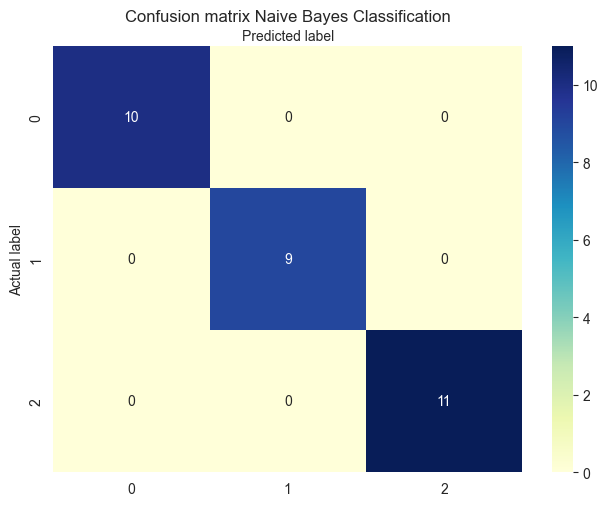

In [181]:
# Comparing the Real Values with Predicted Values
# a Pandas DataFrame is created to compare the classified values of both 
# the original Test set (y_test) and the predicted results (y_pred)

df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': y_pred})

# import the metrics class
from sklearn import metrics

cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred)

# Visualizing Confusion Matrix using Heatmap
# Define the 3 classes 
class_names = [0, 1, 2]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix Naive Bayes Classification')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Bernoulli Naive Bayes
Bernoulli Naive Bayes is one of the variants of the Naive Bayes algorithm in machine learning. It is very useful to be used when the dataset is in a binary distribution where the output label is present or absent. The main advantage of this algorithm is that it only accepts features in the form of binary values such as:
- True or False
- Spam or Ham
- Yes or No
- 0 or 1

Here are some other advantages of using this algorithm for binary classification:
- It is very fast compared to other classification algorithms.
- Sometimes machine learning algorithms do not work well if the dataset is small, but this is not the case with this algorithm because it gives more accurate results compared to other classification algorithms in the case of a small dataset.
- It’s fast and can also handle irrelevant features easily.

In [182]:
# importing the dataset
dataset = pd.read_csv('NaiveBayes.csv')
dataset.head(10)


,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [183]:
# split the data into inputs and outputs
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

In [184]:
# training and testing data
from sklearn.model_selection import train_test_split

# assign test data size 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [185]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)


In [186]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

classifer = BernoulliNB()
classifer.fit(X_train, y_train)

BernoulliNB()

In [187]:
# testing the model
y_pred = classifer.predict(X_test)


In [188]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print('Accuracy = ', accuracy_score(y_pred, y_test))


Accuracy =  0.77


In [189]:
# import the metrics class
from sklearn import metrics

cnf_matrix1 = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix1

array([[58,  5],
       [18, 19]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

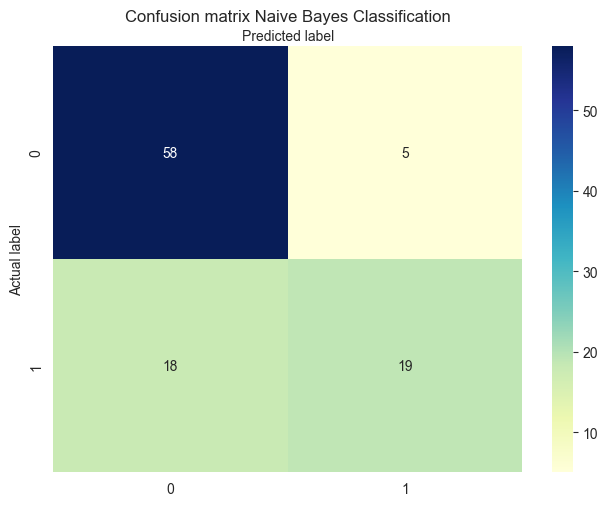

In [190]:
# Visualizing Confusion Matrix using Heatmap
# Define the 3 classes 
class_names = [0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix1), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion matrix Naive Bayes Classification')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [191]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        63
           1       0.79      0.51      0.62        37

    accuracy                           0.77       100
   macro avg       0.78      0.72      0.73       100
weighted avg       0.77      0.77      0.76       100



### Gaussian Naive Bayes

In [192]:

# Sample data set
# assigning features and label variables
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny',
           'Overcast', 'Overcast', 'Rainy']

# output class
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']


In [193]:
# the input and output both are not numeric values. 
# Before feeding this data to our model, we have to encode the non-numeric values into numeric ones
# Overcast = 0, Rainy = 1, Sunny = 2. This is called label encoding


# Encoding
# Import LabelEncoder
from sklearn import preprocessing

# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded = labelCode.fit_transform(weather)

# The LabelEncoder will convert the string values to numeric values. 
# For example, if we print the encoded weather, it will no longer contain numeric values.
# Printing the encoded values

print(weather_encoded)


[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [194]:
# we can also encode the play class.
# import LabelEncoder
from sklearn import preprocessing

# creating LabelEncoder
labelCode = preprocessing.LabelEncoder()

# converting string labels into numbers.
label = labelCode.fit_transform(play)
print(label)


[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [195]:
# Generating model. We have already seen that our input values are in a single-dimensional array. 
# By default, the model training takes values in multi-dimensional arrays


# Converting array
# importing numpy module
# import numpy as np

# converting 1D array to 2D
weather_2d = np.array(weather_encoded).reshape(-1, 1)
print(weather_2d)

[[2]
 [2]
 [0]
 [1]
 [1]
 [1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [0]
 [1]]


In [196]:
# Training the model
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
model = GaussianNB()

# train the model using the training sets
model.fit(weather_2d, label)


GaussianNB()

In [197]:
# predicting the Model
predicted= model.predict([[0]]) # 0:Overcast

# printing predicted value
print(predicted)


[1]
